In [1]:
import numpy as np
from sympy import *
from sympy.abc import x, t

from parabolicpde import ParabolicProblem, backwardeuler
from hyperbolicpde import HyperbolicProblem

from visualizations import plot_solution
import matplotlib.pyplot as plt

## Worksheet 1 Question 3 ##

deltax = 0.001
deltat          lambda          Error - BE      Error - CN      
0.05000000      50000.00        0.24421855      0.01587950      
0.01612903      16129.03        0.06865465      0.00167282      
0.00500000      5000.00         0.02012346      0.00016037      
0.00158228      1582.28         0.00625189      0.00001548      
0.00050000      500.00          0.00196424      0.00000096      
0.00015813      158.13          0.00062047      0.00000049      
0.00005000      50.00           0.00019652      0.00000064      


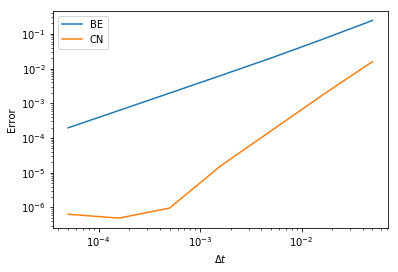

In [2]:
# Comparison of Backward Euler and Crank-Nicholson schemes varying deltat 
mx = 1000   # large value of mx = small value of deltax
mt = np.logspace(1,4,7) # test across 4 orders of magnitude

# Problem to use for test, uncomment to change test problem
dp = ParabolicProblem()
# dp = ParabolicProblem(lbc=Neumann(0,0), rbc=Neumann(1,0), ic=x)
# dp = ParabolicProblem(source=1, rbc=Dirichlet(1,1), ic=0)


errors1 = []; errors2 = []; lmbdas = []
u = exp(-(pi**2)*t)*sin(pi*x)  # exact solution

print('deltax = {}'.format(1/mx))
print('{:16}{:16}{:16}{:16}'.format('deltat', 'lambda', 'Error - BE', 'Error - CN'))
for n in mt:
    n = int(n)
    _,error1,lmbda = dp.solve_at_T(0.5, mx, n, 'BE', u_exact=u, plot=False)
    _,error2,_ = dp.solve_at_T(0.5, mx, n, 'CN', u_exact=u, plot=False)
    lmbdas.append(lmbda)
    errors1.append(error1)
    errors2.append(error2)
    print('{:<16.8f}{:<16.2f}{:<16.8f}{:<16.8f}'.format(
            0.5/n, lmbda, error1, error2))

deltat = 0.5 / mt
plt.loglog(deltat, errors1, label='BE')
plt.loglog(deltat, errors2, label='CN')
plt.ylabel('Error')
plt.xlabel(r'$\Delta t$')
plt.legend(loc='best')


plt.show()

deltat = 1e-05
deltax          lambda          Error - BE      Error - CN      
0.10000000      0.00            0.00248938      0.00247470      
0.05263158      0.00            0.00069856      0.00068380      
0.02702703      0.01            0.00019566      0.00018082      
0.01408451      0.05            0.00006400      0.00004914      
0.00724638      0.19            0.00002788      0.00001301      
0.00373134      0.72            0.00001832      0.00000345      
0.00193424      2.67            0.00001579      0.00000093      
0.00100000      10.00           0.00001511      0.00000025      


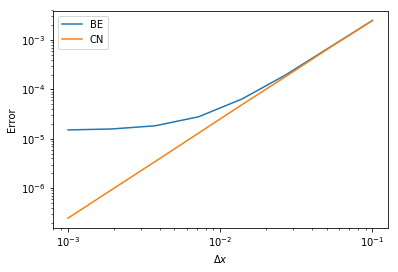

In [3]:
# Comparison of Backward-Euler and Crank-Nicholson schemes varying deltax
mt = 5000   # large value of mt = small value of deltat
mx = np.logspace(1,3,8) # test across 2 orders of magnitude

# Problem to use for test, uncomment to change test problem
dp = ParabolicProblem()
# dp = ParabolicProblem(lbc=Neumann(0,0), rbc=Neumann(1,0), ic=x)
# dp = ParabolicProblem(source=1, rbc=Dirichlet(1,1), ic=0)


errors1 = []; errors2 = []; lmbdas = []
u = exp(-(pi**2)*t)*sin(pi*x)  # exact solution

print('deltat = {}'.format(0.05/mt))
print('{:16}{:16}{:16}{:16}'.format('deltax', 'lambda', 'Error - BE', 'Error - CN'))
for m in mx:
    m = int(m)
    _,error1,lmbda = dp.solve_at_T(0.05, m, mt, 'BE', u_exact=u, plot=False, norm='Linf')
    _,error2,_ = dp.solve_at_T(0.05, m, mt, 'CN', u_exact=u, plot=False, norm='Linf')
    lmbdas.append(lmbda)
    errors1.append(error1)
    errors2.append(error2)
    print('{:<16.8f}{:<16.2f}{:<16.8f}{:<16.8f}'.format(
            1/m, lmbda, error1, error2))

deltax = 1 / mx
plt.loglog(deltax, errors1, label='BE')
plt.loglog(deltax, errors2, label='CN')
plt.ylabel('Error')
plt.xlabel(r'$\Delta x$')
plt.legend(loc='best')

plt.show()


deltat = 1e-05
deltax          lambda          Error - FE      
0.10000000      0.00004000      0.05981130      
0.08333333      0.00005760      0.04200568      
0.06250000      0.00010240      0.02387585      
0.04761905      0.00017640      0.01389138      
0.03703704      0.00029160      0.00843164      
0.02857143      0.00049000      0.00490311      
0.02173913      0.00084640      0.00290847      
0.01694915      0.00139240      0.00176257      
0.01298701      0.00237160      0.00102923      
0.01000000      0.00400000      0.00060444      


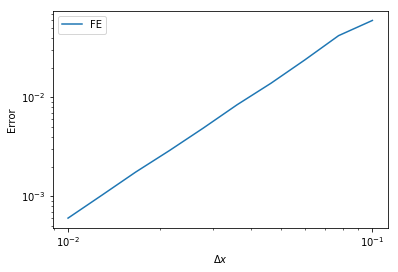

In [4]:
# Errors varying deltax with forward Euler scheme
mt = 5000   # large value of mt = small value of deltat
mx = np.logspace(1,2,10) 

# Problem to use for test, uncomment to change test problem
dp = ParabolicProblem(L=5)  # increase width of interval to make deltax larger
# dp = ParabolicProblem()
# dp = ParabolicProblem()


errors = []; lmbdas = []
u = exp(-(pi**2)*t)*sin(pi*x)  # exact solution

print('deltat = {}'.format(0.05/mt))
print('{:16}{:16}{:16}'.format('deltax', 'lambda', 'Error - FE'))
for m in mx:
    m = int(m)
    _,error,lmbda = dp.solve_at_T(0.05, m, mt, 'FE', u_exact=u, plot=False, norm='Linf')
    lmbdas.append(lmbda)
    errors.append(error)
    print('{:<16.8f}{:<16.8f}{:<16.8f}'.format(
            1/m, lmbda, error))

deltax = 1 / mx
plt.loglog(deltax, errors, label='FE')
plt.ylabel('Error')
plt.xlabel(r'$\Delta x$')
plt.legend(loc='best')

plt.show()

## Worksheet 2 Question 1: Stability and Accuracy##

Demonstration of stability for explicit and implicit solvers of hyperbolic equations. For the explicit solver, $\lambda = 1$ is the 'magic timestep'. The implicit solver is unconditionally stable.

In [5]:
# demonstrate stability of explicit method for lambda <= 1

mx = np.linspace(20, 50, 7, dtype=np.int32) 
mt = 40
T = 1
# use default problem
hp = HyperbolicProblem()

u= cos(pi*t)*sin(pi*x)

print('{:20}{:20}'.format('lambda', 'absolute error'))
# use explicit solver
for m in mx:
    _, error, lmbda = hp.solve_at_T(T, m, mt, 'E', u_exact=u, plot=False)
    print('{:<20.15f}{:<20.15f}'.format(lmbda, error))

lambda              absolute error      
0.500000000000000   0.000009285036161   
0.625000000000000   0.000002807644673   
0.750000000000000   0.000000764622725   
0.875000000000000   0.000000127947435   
1.000000000000000   0.000000000000005   
1.125000000000000   10.109895354404332  
1.250000000000000   63705904.584373556077480


In [6]:
# demonstrate unconditional stability of implicit method

mx = np.linspace(20, 100, 14, dtype=np.int32) 
mt = 40
T = 1
# use default problem
hp = HyperbolicProblem()

u= cos(pi*t)*sin(pi*x)

print('{:20}{:20}'.format('lambda', 'absolute error'))
# use explicit solver
for m in mx:
    _, error, lmbda = hp.solve_at_T(T, m, mt, 'I', u_exact=u, plot=False)
    print('{:<20.15f}{:<20.15f}'.format(lmbda, error))

lambda              absolute error      
0.500000000000000   0.006996752232799   
0.650000000000000   0.008543060075831   
0.800000000000000   0.013113054149287   
0.950000000000000   0.018304157607198   
1.100000000000000   0.022486224375100   
1.250000000000000   0.025933088796954   
1.400000000000000   0.028656022191635   
1.575000000000000   0.031843274460363   
1.725000000000000   0.034090738848922   
1.875000000000000   0.036279003421946   
2.025000000000000   0.038632986905040   
2.175000000000000   0.040925982388433   
2.325000000000000   0.042996077533699   
2.500000000000000   0.045154953819694   


## Worksheet 2 Question 2: Tsunami ##

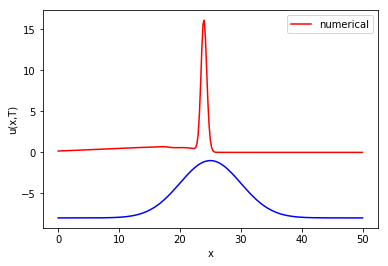

In [7]:
from hyperbolicpde import TsunamiProblem

# travelling wave with variable seabed
L=50
h0=8

# initial wave
wave = 20*exp(-(x-5)**2/3)

# seabed disturbance
seabed = 7*exp(-(x-25)**2/50)
#seabed = 0

tp = TsunamiProblem(L, h0, wave, seabed)

# T = 40 makes a good animation
uT = tp.solve_at_T(8.5, 250, 600, plot=True, animate=False)

# to create animation
# uT = tp.solve_at_T(40, 250, 600, plot=False, animate=True)

## Worksheet 3 Question 1 ##

C:\Users\james\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


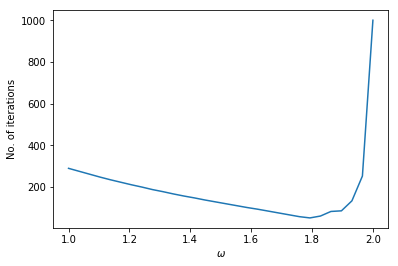

In [3]:
from ellipticpde import EllipticProblem
import numpy as np
import matplotlib.pyplot as plt

# investigate number of interations for a range of omegas

omegas = np.linspace(1,2,30)
mx = 40              # number of gridpoints in x
my = 20              # number of gridpoints in y
maxerr = 1e-4        # target error
maxcount = 1000      # maximum number of iteration steps
omega = 1.5
ep = EllipticProblem()  
counts = []

for omega in omegas:
    _,count,_,_ = ep.solve(mx, my, maxcount, maxerr, omega, plot=False)
    counts.append(count)

plt.plot(omegas, counts)
plt.xlabel(r'$\omega$')
plt.ylabel('No. of iterations')
plt.show()

In [5]:
from scipy.optimize import minimize_scalar


def num_iterations(omega):
    _,count,_,_=ep.solve(mx, my, maxcount, maxerr, omega, plot=False)
    return count


res = minimize_scalar(num_iterations, bracket=(1,2), tol=1e-5)
print(res)

C:\Users\james\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\james\Documents\Scientific Computing\pdes\ellipticpde.py:101: RuntimeWarning: overflow encountered in double_scalars
  lambdasqr*(u_new[i,j-1]+u_old[i,j+1]) )/(2*(1+lambdasqr))
C:\Users\james\Documents\Scientific Computing\pdes\ellipticpde.py:105: RuntimeWarning: invalid value encountered in subtract
  err = np.max(np.abs(u_new-u_old))


     fun: 52
    nfev: 22
     nit: 18
 success: True
       x: 1.7777568954434548
